In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("fruits1.csv")

In [3]:
df.head()

,Class,Height,Width,Mass,Color_Score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


In [4]:
df.isnull().sum()

Class          0
Height         0
Width          0
Mass           0
Color_Score    0
dtype: int64

In [5]:
df.columns

Index(['Class', 'Height', 'Width', 'Mass', 'Color_Score'], dtype='object')

In [6]:
from sklearn.preprocessing import LabelEncoder,StandardScaler,MinMaxScaler
le=LabelEncoder()

In [7]:
sc=StandardScaler()
sc1=MinMaxScaler()

In [8]:
df.head()

,Class,Height,Width,Mass,Color_Score
0,apple,192,8.4,7.3,0.55
1,apple,180,8.0,6.8,0.59
2,apple,176,7.4,7.2,0.60
3,mandarin,86,6.2,4.7,0.80
4,mandarin,84,6.0,4.6,0.79


In [9]:
print(df.groupby('Class').size())

Class
apple       19
lemon       16
mandarin     5
orange      19
dtype: int64


In [34]:
df["Class"]=le.fit_transform(df["Class"])

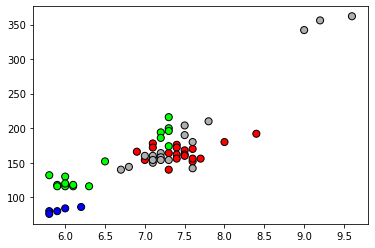

In [35]:
from matplotlib.colors import ListedColormap, BoundaryNorm
cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
plt.scatter(df["Width"],df["Height"], s=50, c=df["Class"], cmap=cmap_bold, edgecolor = 'black')


In [14]:
df["Class"]=le.fit_transform(df["Class"])

In [15]:
set(df["Class"])

{0, 1, 2, 3}

In [16]:
X=df.iloc[:,1:]
Y=df.iloc[:,0]
X=sc1.fit_transform(X)
Y=np.array(Y)

In [17]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,Y,random_state=0)

In [18]:
from sklearn.neighbors import KNeighborsClassifier 
model=KNeighborsClassifier()

In [19]:
model.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [20]:
y_predict=model.predict(x_test)

In [21]:
from sklearn.metrics import confusion_matrix
c=confusion_matrix(y_test,y_predict)
print(c)

[[4 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 7]]


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_predict)

0.9333333333333333

In [23]:
model.score(x_test,y_test)

0.9333333333333333

###### euclidean distance

In [24]:
import numpy as np
def euclidean_distance(x1,x2):
    
    d=0
    ### square the distance between two vectors
    x=[d+np.power((x1[i]-x2[i]),2)for i in range(len(x1))]
    ### sum the distance between the all the points in the vector
    k=np.sum(x)
    return np.sqrt(k)   

#### training our data and predicting the testing data

In [25]:
## x_test : test set ,x_train=traing set,y_train=traning set labels
## n=no.of neighbourss
def predictor(x_test,x_train,y_train,n):
    y_p=np.zeros(x_test.shape[0])
    for i,test in enumerate(x_test):
        # caclutate distance between the train and test to sort the training samples by their distance ,
        #and get the n-neighbours
        # argsort function : return its index based on the data init in the sort order 
        k=np.argsort([euclidean_distance(test,x) for x in x_train])[:n]
        k1=np.array([y_train[j] for j in k])
        #label as most common label based on the n neighbours
        y_p[i]=pd.Series(k1).groupby(k1).count().idxmax()
    
    return y_p
    

In [26]:
y_p=predictor(x_test,x_train,y_train,n=5)

In [27]:
accuracy_score(y_test,y_p)

0.9333333333333333

In [28]:
from sklearn.metrics import confusion_matrix
c1=confusion_matrix(y_test,y_p)
print(c1)

[[4 0 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 1 0 7]]


In [29]:
y_p1=predictor(x_train,x_train,y_train,n=5)

In [30]:
accuracy_score(y_train,y_p1)

0.9545454545454546

In [31]:
c2=confusion_matrix(y_train,y_p1)
print(c2)

[[15  0  0  0]
 [ 0 14  0  0]
 [ 0  0  4  0]
 [ 1  1  0  9]]


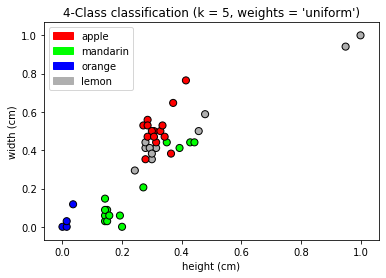

In [32]:
import matplotlib.cm as cm
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.patches as mpatches
import matplotlib.patches as mpatches
from sklearn import neighbors
X = df[['Mass', 'Width', 'Height', 'Color_Score']]
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
def plot_fruit_knn(X, y, n_neighbors, weights):
    X_mat = X[['Height', 'Width']]
    X_mat=sc1.fit_transform(X[['Height','Width']])
    y_mat = y.as_matrix()
# Create color maps
    #cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF','#AFAFAF'])
    cmap_bold  = ListedColormap(['#FF0000', '#00FF00', '#0000FF','#AFAFAF'])
    #clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    #clf.fit(X_mat, y_mat)
# Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    #mesh_step_size = 0.01  # step size in the mesh
    plot_symbol_size = 50
    
    #x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    #y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    #xx, yy = np.meshgrid(np.arange(x_min, x_max, mesh_step_size),
                       #  np.arange(y_min, y_max, mesh_step_size))
    #Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
    #Z = Z.reshape(xx.shape)
    plt.figure()
    #plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
# Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    #plt.xlim(xx.min(), xx.max())
    #plt.ylim(yy.min(), yy.max())
    patch0 = mpatches.Patch(color='#FF0000', label='apple')
    patch1 = mpatches.Patch(color='#00FF00', label='mandarin')
    patch2 = mpatches.Patch(color='#0000FF', label='orange')
    patch3 = mpatches.Patch(color='#AFAFAF', label='lemon')
    plt.legend(handles=[patch0, patch1, patch2, patch3])
    plt.xlabel('height (cm)')
    plt.ylabel('width (cm)')
    plt.title("4-Class classification (k = %i, weights = '%s')" % (n_neighbors, weights))    
    plt.show()
plot_fruit_knn(X_train, y_train,5,'uniform')